## Japanese Credit Classification

Credit concession classification models have been developed since banks saw his loans portfolios getting bigger and bigger. An extensive literature have been produced approaching different techniques in order to select the solvent curstomer from the riskier ones.

This notebook presents some modeling code toward to predict defaulting applications in a loans pool. 

The current (small) dataset is available from [here][www.bla.com], and already was subject of some academic papers. According the sources, given the confidentiality of data all categorical and sensible data where reescalad. Here we will treat the problem to classify a loan as good or bad! Then, we will do a classification research here. 

In [2]:
# Importing all packages needed
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# silence warnings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')

### Exploratory Data Analysis

Here we will:

1. Load the dataset (it have missing values marked as '?')
2. Take a look in the datatypes in each column. 
3. Compute some dataset stats
4. Create pairplots aiming to see possible correlations beteween data
5. Create a count plot in order to assess the balancing between good and bad data

In [6]:
data = pd.read_csv('crx.data', header=None, na_values='?')
data = data.dropna()
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [7]:
data.dtypes

0      object
1     float64
2     float64
3      object
4      object
5      object
6      object
7     float64
8      object
9      object
10      int64
11     object
12     object
13    float64
14      int64
15     object
dtype: object

In [8]:
data.describe()

,1,2,7,10,13,14
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


The data set has 690 elements and by dropping missing data it goes to 653 cases. The features 2,7,10 and 14 are numerical attributes. All other are categorical values. The defaulted loans are signaled as "-" and the  good ones "+" in the last column.

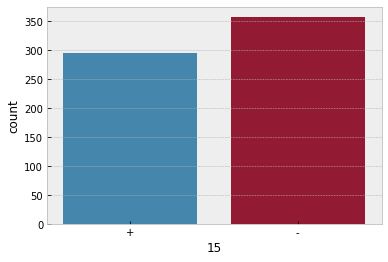

In [12]:
# Counting the number of each positive and negatives outcomes
sns.countplot(data[15])

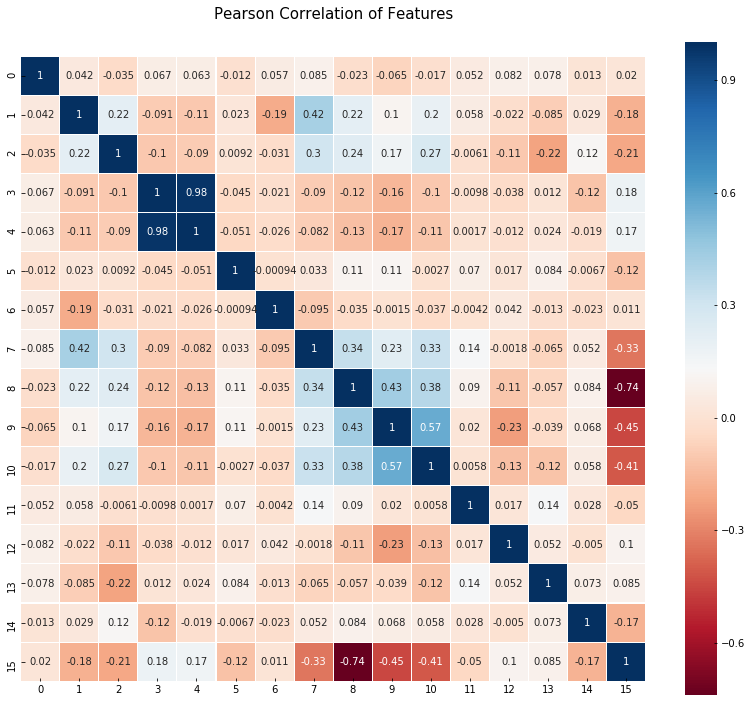

In [18]:
# Finally ploting the correlation matrix between variables. 
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

There are no strong correlation between pairs. Considering the nature of dataset, it is expected that some common raw characteristics was previously treated or removed.

Obs: For the sake of clarity it is omitted the PCA analisys once it just shows all variables already have been reescaled and kept similar explanatory power.

### Preprocessing

The raw characteristics from dataset must be treated to proceed with modeling. The Sklearn toolkit have a hands on package helping transform and encode categorical and non numeric values to a suitable numerical format. 

In [14]:
# Label encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = data

# Numerical atributes columns
num_att = [1,2,7,10,13,14]

# Categorical attributes columns
cat_att = [0,3,4,5,6,8,9,11,12,15]

X[cat_att] = data[cat_att].apply(LabelEncoder().fit_transform)
X[num_att] = StandardScaler().fit_transform(data[num_att])



After normalize and encode categorical values to numerical ones, it is now time to split data into training and testing data. 

In [28]:
# Spliting data between test and train sets
from sklearn.model_selection import train_test_split

# Converting X dataframe to x matrix for attributes from 0 to 14
x = X.loc[:,0:14].values
# Separating out the target, the 15th attribute
y = X.loc[:,15].values


# Creating train and test datasets with 30% of data set as test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5)


### The canonical approach for classification problems: Logistic Regression

Being a binary classification problem, the first approach is to apply a logist regression over data. Lets use sklearn Logistic Regression. Some regression parameter are set up by default. Lets go directly trying an hyperparameters tuning looking for the best set up.

In [36]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

# Create logistic regression
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_test, y_test)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Regression results scores

In [48]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


By the way, the results of hyperparameters selections shows that the default regression parameters (C = 1.0 and Penalty = l2) are the best for the problem. Computing the score (more info about score maths here) over test set tell us the model achieved 88%. It is pretty good considering the previous results from literature.

Some other assessment tools are the confusion matrix, the ROC curve and the k-fold cross validation.

#### K-Fold Cross Validation

The goal of cross-validation is to test the model’s ability to predict new data that were not used in estimating it, in order to flag problems like overfitting and to give an insight on how the model will generalize to an independent dataset (in our case, in the test set). 

In [72]:
from sklearn import cross_validation
from sklearn import model_selection

results = model_selection.cross_val_score(logreg, X_test, y_test, cv=kfold, scoring='accuracy')

print("Accuracy: %0.2f (+/- %0.2f)" % (results.mean(), results.std() * 3))

#print(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85 (+/- 0.19)


A cross validation performed over the test set resulted in a mean 85% precision. It is satisfatory though we are not dealing with missing data and ignored the unbalance between bad cases and good cases. A good next step might be to study this unbalance.

#### Confusion Matrix

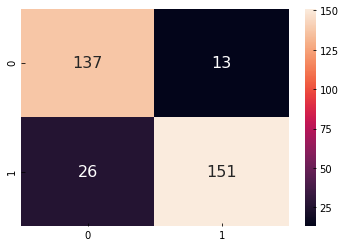

In [67]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, annot_kws={'size':16}, fmt='g');

Type I Error:
 Also known as a “false 
positive.” A Type I error incorrectly rejects 
a true null hypothesis. In lending, a 
Type I error occurs when a borrower is 
incorrectly deemed creditworthy, when 
in fact, the institution should not give the 
borrower a loan.
Type II Error:
 Also known as a “false 
negative.” A Type II error is the failure to 
reject a false null hypothesis. In lending, 
a Type II error occurs when a financial 
institution denies a loan to a creditworthy 
borrower.
The misclassification cost of a Type I 
error is more costly for lending institu
-
tions than a Type II error.
 For a Type I 
error, the lender will likely lose not only 
the principal but also the interest on the 
principal. On the other hand, for a Type 
II error, the lender loses only the interest 
and expected profit from the loan.

#### ROC curve

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems.

The AUC represents a model’s ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random. Learn more about ROC here.

ROC can be broken down into sensitivity and specificity. A binary classification problem is really a trade-off between sensitivity and specificity.

* Sensitivity is the true positive rate also called the recall. It is the number instances from the positive (first) class that actually predicted correctly.

* Specificity is also called the true negative rate. Is the number of instances from the negative class (second) class that were actually predicted correctly.


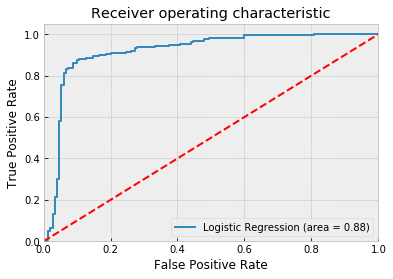

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Lets test the generalization capacity of your model throught cross-validation

### Precision, score and recall

Accuracy - Accuracy is the ratio of correctly predicted observation to the total observations. One may think that, if we have high accuracy then our model is best. It is given by

$accuracy = \frac{TP+TN}{TObs}$

where $TObs = TP+FP+FN+TN$

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. High precision relates to the low false positive rate.

$precision = \frac{TP}{TP+FP}$

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class.

$recall = \frac{TP}{TP+FN}$ 

F1 score - Maybe this is the most hermetic indicator from the list. F1 Score is the weighted average of Precision and Recall. It takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

$ f1_score = \frac{2*(Recall * Precision)}{(Recall + Precision)}$

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.91      0.88       150
          1       0.92      0.85      0.89       177

avg / total       0.88      0.88      0.88       327



Looking at f1-score by class it is possible to conclude that the model is better in classifing bad loans than good ones (0.89 to 0.88). It points out, again, to the unbalanced dataset.